# DISTRIBUIÇÕES DE PROBABILIDADE DE VARIÁVEIS CONTÍNUAS
Consiste em um matérial elaborado por Lucas Sousa Martins
para o curso de DSA na USP/Esalq, contendo informações sobre distribuições de probabilidade para variáveis aleatórias contínuas.

Os exemplos são do livro "Manual de Análise de dados - Estatísta e Modelagem Multivariada com Excel, SPSS e Stata"

GITHUB: https://github.com/lucas0usa

LINKEDIN: https://www.linkedin.com/in/lucass0usa/

Uma variável aleatória é tida como uma que apresenta um valor único para cada elemento, sendo esse valor determinado aleatóriamente. Podendo ser contínuas e discretas.



###  Distribuição normal

É a distribuição mais utilizada e importante, permitindo modelar diversos fenômenos naturais, comportamento humano, dentre outros. Uma variável aleatórioa X com média M e desvio-padrão Sigma>0, tem distribuição normal denotada por X~N(M,Sig²). 

Sua FDP é dada por:

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{\frac{(x-μ)²}{2σ²}},    -∞≤x≤∞$

A área sobre a curva é dada em função de Sig.

$+-σ = 68,26\%$

$+-2σ= 95,44\%$

$+-3σ= 99,74\%$

$E(X)= M$ 

$Var(X)= σ²$

A função de distribuição acumulada de F(x) é obtida integrando a fdp de -inf a +inf:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### Exercício distribuição Normal
Sabe-se que a espessura média dos abrigos para mangueira produzidos em uma fábrica (X) segue uma distribuição normal com média 3 mm e desvio-padrão 0,4 mm. Determine: 

a) P(X > 4,1)

b)P(X>3)

e) P(X=<3)

d) P(=X<3,5)

e) P(X < 2,3)

f) P(2 =< X =< 3,8)

E(X)= 0.0 
 Var(X)= 1.0 
 Assimetria= 0.0 
 Curtose= 0.0 
 a) 0.002980 
 b) 0.500000 
 c) 0.500000 
 d) 0.894350 
 e) 0.040059 
 f) 0.971040


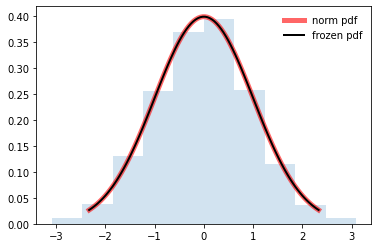

In [ ]:
#É preciso normalizar através do Z-score
a=((4.1-3)/0.4)
b=((3-3)/0.4)
c=((3-3)/0.4)
d=((3.5-3)/0.4)
e=((2.3-3)/0.4)
f1,f2=((2-3)/0.4), ((3.8-3)/0.4)


mean, var, skew, kurt = norm.stats(moments='mvsk')
a= 1-norm.cdf(a)
b=norm.cdf(b)
c=norm.cdf(c)
d=norm.cdf(d)
e=norm.cdf(e)
f=norm.cdf(f2)-norm.cdf(f1)


print(f"E(X)=",mean, "\n Var(X)=",var, "\n Assimetria=", skew, "\n Curtose=",kurt,
      "\n a)",'%0.6f' %a,
      "\n b)",'%0.6f' %b,
      "\n c)",'%0.6f' %b,
      "\n d)",'%0.6f' %d,
      "\n e)",'%0.6f' %e,
      "\n f)",'%0.6f' %f,
      )


#FDA Normal
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Distribuição Exponencial

Essa distribuição é utilizada em confiabilidade de sistemas e teoria das filas. Tem como principal característica a propriedade de não possuir memória, isto é, o tempo de vida futuro (t) de determinado objeto tme a mesma distribuição, independente do seu tempo de vida passada (s), para quaisquer s,t>0, conforme:

$P(X>s+t|X>s)=P(X>t)$

Uma variável aleatória contínua X tem distribuição exponencial com parâmetro $\lambda$>0, denotada por X~exp($\lambda$), se sua FDP for dada por:

$f(x)=\lambda*e^{(-\lambda x)}, se x>=0$

$f(x)=0 , se x<0$

$E(X)=\frac{1}{\lambda}$

$Var(x)=\frac{1}{\lambda²}$

A distribuição é assimétrica positiva, com maior frequência para valores menores de x. Quanto maior o valor de $\lambda$ mais rapidamente a função tende a zero.

Sua FDA é dada por:

$f(x)=P(X>x)=e^{-\lambda x}$

Em confiabilidade de sistemas a variável aleatória $X$ representa a duração de vida $\lambda$ é a taxa de falha dado pela divisão do número de falhas pelo tempo de operação. Enquanto na teoria das filas a variável aleatória $X$ representa o tempo médio de espera até a próxima chegada e $\lambda$ é a taxa média de chegadas, isto é, o número esperado de chegadas por unidade de tempo.

In [ ]:
from scipy.stats import expon

#### Exercício Distribuição Exponencial
O tempo de vida útil de um componente eletrônico segue uma distribuição exponencial com vida média de 120 horas. Determine:

a) Probabilidade de um componente falhar nas primeiras 100 horas de funcionamento;

b) Probabilidade de um componente durar mais do que 150 horas. 


E(X)= 1.0 
 Var(X)= 1.0 
 Assimetria= 2.0 
 Curtose= 6.0 
 a) 1.0 
 b) 0.0


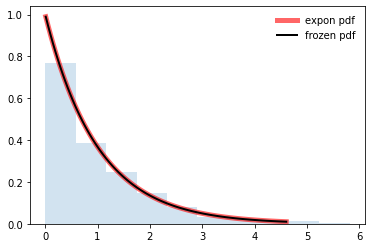

In [ ]:
lamb=120
a=100
b=150

a=expon.cdf(a, scale=lamb)
b=1-expon.cdf(b, scale=lamb)
mean, var, skew, kurt = expon.stats(scale=1/lamb,moments='mvsk')
print("E(X)=",mean, "\n Var(X)=",var, "\n Assimetria=", skew, "\n Curtose=",kurt,
      "\n a)", a,
      "\n b)", b)


#FDA Exponencial
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01, scale=lamb),
                expon.ppf(0.99, scale=lamb), 100)
ax.plot(x, expon.pdf(x, scale=lamb),
       'r-', lw=5, alpha=0.6, label='expon pdf')
rv = expon(scale=lamb)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals, scale=lamb))
r = expon.rvs(size=1000, scale=lamb)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Exercício Distribuição Gamma
Consiste em uma distribuição mais geral, de modo como distribuições Erlang, Exponencial e qui-quadrado são casos particulares. É utilizada em fenômenos físicos, economia, teoria dos seguros entre outros. 

Uma variável aleatória contínua tem distribuição gamma com parâmetros $\alpha$ > 0 e $\lambda$ >0, denotada por X~Gama($\alpha$, $\lambda$), com FDP dada por:

$f(x)=\frac{\Lambda^{\alpha}}{T(\alpha)} *x^{(\alpha-1)} * e^{-\lambda x}, se x>=0$

$f(x)= 0 , se x< 0$

Tal que $T(\alpha)$ é dado pela integrau de $e^{-x}*x^{\alpha-1}$

$E(X)= \alpha \lambda$

$Var(X)=\alpha \lambda^{2}$

##### Distribuição Erlang:

Uma distribuição Gama com $\alpha$ inteiro positivo é denominada distribuição Erlang.

##### Distribuição Exponencial:

Uma distribuição Gama com parâmetro $\alpha$=1 é denominada distribuição exponencial.

##### Distribuição Qui-Quadrado

Uma distribuição Gama com parâmetro $\alpha=\frac{n}{2}$ e $\lambda=\frac{1}{2}$ é denominada distribuição qui-quadrado com V graus de liberdade.
A distribuição de qui-quadrado é a soma dos quadrados de V variáveis aleatórias que apresentam distribuição normal com média zero e variância 1. Para valores elevados de V, a distribuição de qui-quadrado se aproxima de uma normal. Além disso, uma distribuição qui-quadrado com 2 graus de liberdade equivale a uma distribuição exponencial com $\lambda=\frac{1}{2}$ 

$E(X)=v$

$Var(x)=2v$


In [ ]:
from scipy.stats import gamma

E(X)= 1.0 
 Var(X)= 0.5 
 Assimetria= 1.414213562373095 
 Curtose= 3.0


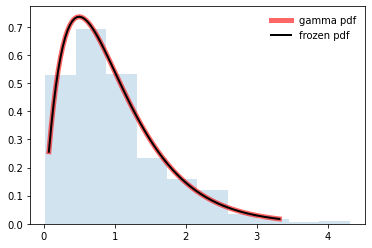

In [ ]:
alpha = 3
lamb = 2
mean, var, skew, kurt = gamma.stats(a=alpha,scale=lamb, moments='mvsk')
print("E(X)=",mean, "\n Var(X)=",var, "\n Assimetria=", skew, "\n Curtose=",kurt)

#FDA Gamma
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.01, a=alpha, scale=lamb),
                gamma.ppf(0.99, a=alpha, scale=lamb), 100)
ax.plot(x, gamma.pdf(x, a=alpha, scale=lamb),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
rv = gamma(a=alpha,scale=lamb)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = gamma.ppf([0.001, 0.5, 0.999], a=alpha, scale=lamb)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a=alpha, scale=lamb))
r = gamma.rvs(a=alpha, size=1000, scale=lamb)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

#### Exercício Distribuição Qui-Quadrado

Suponha que a variável aleatória X siga uma distribuição qui-quadrado (X2) com 13 graus de liberdade. Determine:

a) P(X > 5)

b) O valor x tal que P(X =< x) == 0,95

c) O valor x tal que P(X > x) == 0,95 

E(X)= 13.0 
 Var(X)= 26.0 
 Assimetria= 0.7844645405527362 
 Curtose= 0.9230769230769231 
 a) 0.9779867385733428 
 b) 22.362032494826934 
 c) 5.891864337709849


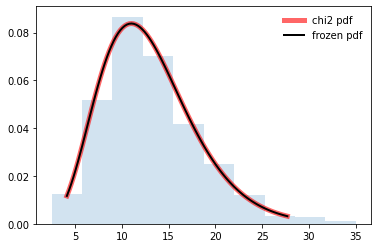

In [ ]:
from scipy.stats import chi2

df = 13
a = 1-chi2.pdf(5, df, loc=0, scale=1)
b = chi2.ppf(0.95, df, loc=0, scale=1)
c = chi2.isf(0.95, df, loc=0, scale=1)
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
print("E(X)=",mean, "\n Var(X)=",var, "\n Assimetria=", skew, "\n Curtose=",kurt,
      "\n a)", a,
      "\n b)", b,
      "\n c)", c)



#FDA Chi²
fig, ax = plt.subplots(1, 1)
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')
rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = chi2.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], chi2.cdf(vals, df))
r = chi2.rvs(df, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Distribuição Distribuição t de Student

Supondo uma variável aleatória Z que tenha distribuição normal com média zero e desvio-padrão 1, e uma variável aleatória X com distribuição qui-quadrado com V graus de liberdade, de modo que Z e X sejam independentes. Uma variável aleatória contínua T pode então ser definida como:

$T=\frac{Z}{\sqrt{X/v}}$

Podemos dizer que a variável T possui distribuição t de Student com V graus de liberdade, denotada por T ~ $tv$ se sua função densidade de probabilidade for dada por:

$f(t)=\frac{\Gamma\left(\frac{v+1}{2}\right)}{\Gamma\left(\frac{v}{2}\right)\sqrt{\pi v}}* (1+ \frac{t^{2}}{v})^{\frac{v+1}{2}},-∞< t < ∞$

onde,  $\Gamma(\alpha)=\int_{0}^{∞} e^{-x}*x^{\alpha-1}dx$ 

A distribuição t possui o mesmo formato que a normal padrão, porém com caudas mais longas, podendo gerar valores mais extremos. O parâmetro v são os graus de liberdade e caracteriza a forma da distribuição, quanto maior o vlaor de v, mais a distribuição t se aproxima de uma distribuição normal.

$E(T)=0$

$Var(T)=\frac{v}{v-2 , v>2}$

#### Exercício Distribuição T student

Suponha que a variável aleatória T segue distribuição t de Student com 7 graus de liberdade. Determine:

a) P(T> 3,5)

b) P(T< 3)

c) P(T < -0,711)

d) O valor t tal que P(T:5: t) = 0,95

e) O valor t tal que P(T > t) = 0,10 

E(X)= 0.0 
 Var(X)= 1.4 
 Assimetria= 0.0 
 Curtose= 2.0 
 a) 0.004996520440942787 
 b) 0.9900289369340037 
 c) 0.2500412957760087 
 d) 1.894578605061305 
 e) 1.4149239276488585


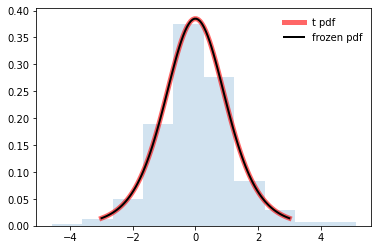

In [15]:
from scipy.stats import t

df= 7 #graus de liberdade

mean, var, skew, kurt = t.stats(df=df, moments='mvsk')
a=1-t.cdf(3.5, df=df)
b=t.cdf(3, df=df)
c=t.cdf(-0.711, df=df)
d= t.ppf(0.95,df=df)
e=t.isf(0.10,df=df)

print("E(X)=",mean, "\n Var(X)=",var, "\n Assimetria=", skew, "\n Curtose=",kurt,
      "\n a)", a,
      "\n b)", b,
      "\n c)", c,
      "\n d)", d,
      "\n e)", e)

#FDA T STUDENT
fig, ax = plt.subplots(1, 1)
x = np.linspace(t.ppf(0.01, df=df),
                t.ppf(0.99, df=df), 100)
ax.plot(x, t.pdf(x,df=df),
       'r-', lw=5, alpha=0.6, label='t pdf')
rv = t(df=df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = t.ppf([0.001, 0.5, 0.999], df=df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df=df))
r = t.rvs(df=df, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Distribuição  F de Snedecor (fischer)

Também conhecida como distribuição de fischer, é associada a testes de variância (ANOVA) para comparação de média de mais de duas populações. Ela é a junção de duas distribuições de qui-quadrado. Considerando duas variáveis aleatórias Y1 e Y2, de modo que:

- Y1 e Y2 são independentes;

- Y1 possui distribuição qui-quadrado com v1 graus de liberdade;

- Y2 possui distribuição qui-quadrado com v2 graus de liberdade;

Defini-se uma nova variável aleatória contínua X tal que:

$X=\frac{\frac{Y1}{v1}}{\frac{Y2}{v2}}$

Diz-se que X segue distribuição F de snedecor com v1 e v2 graus de liberdade, denotada por X~Fv1,v2, e sua FDP é dada por:

$f(x)=\frac{\Gamma\left(\frac{v_1+v_2}{2}\right)\left(\frac{v_1}{v_1}\right)^\frac{v_1}{2}x^{\left(\frac{v_1}{2}-1\right)}}{\Gamma\left(\frac{v_1}{2}\right)\Gamma\left(\frac{v_2}{2}\right)\left[\left(\frac{v_1}{v_1}\right)x+1\right]^\frac{(v_1+v_2)}{2}},x > 0$


onde,  $\Gamma(\alpha)=\int_{0}^{∞} e^{-x}*x^{\alpha-1}dx$ 

É uma distribuição assimétrica positiva, com maior frequência para valores menores de x, e uma cauda mais longa a direita. Contudo, a medida que v1 e v2 tendem ao infinito a distribuição se torna simétrica.

$E(X)=\frac{v_2}{v_2 -2}$, para $v_2$ > 2

$Var(X)=\frac{2 v_2^{2} (v_1+v_2-2)}{v_1 (v_2 -4)(v_2-2)^{2}}$ para $v_2$ > 4

#### Exercício distribuição binomial negativa

Suponha que a variável aleatória X siga uma distribuição F de Snedecor com v1 = 6 graus de liberdade no numerador e V2 = 12 graus de liberdade no denominador, isto é, X~ F6,12. Determine:

a) P(X > 3)

b) O valor x tal que P(X =< x) = 0,975


 E(X)= 1.2 
 Var(X)= 0.96 
 Assimetria= 2.9938207967349952 
 Curtose= 23.166666666666664 
 a) 0.04954521599999986 
 b) 3.7282921153925086


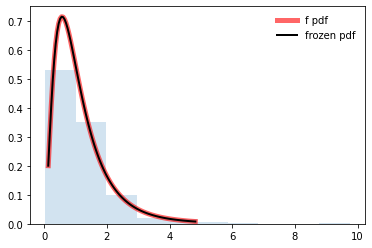

In [22]:
from scipy.stats import f
x=3
dfn=6
dfd=12

a=f.pdf(3,dfn, dfd)
b=f.ppf(0.975,dfn, dfd)

mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
print("\n E(X)=",mean, "\n Var(X)=",var, "\n Assimetria=", skew, "\n Curtose=",kurt,
      "\n a)",a,
      "\n b)",b)

#FDA F
fig, ax = plt.subplots(1, 1)
x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')
rv = f(dfn, dfd)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = f.ppf([0.001, 0.5, 0.999], dfn, dfd)
np.allclose([0.001, 0.5, 0.999], f.cdf(vals, dfn, dfd))
r = f.rvs(dfn, dfd, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()